In [1]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        change_dict = {val : str(val).split('(')[0] for val in df.unique()}
        df = df.replace(change_dict)
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        #category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        category_colors = {category: cmap(i) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c = c, alpha = 0.8, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title=color_by_col, loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

#%matplotlib widget


data_dir = '../data/external/ica_data_objs/eco'
A = pd.read_csv(path.join(data_dir,'A.csv'), index_col = 0)
X = pd.read_csv(path.join(data_dir,'log_tpm.csv'), index_col = 0)
M = pd.read_csv(path.join(data_dir,'M.csv'), index_col = 0)
iM_table = pd.read_csv(path.join(data_dir, 'iM_table.csv'), index_col = 0)
index_to_iM = {str(index) : row['name'] for index, row in iM_table.iterrows()}
M = M.rename(columns = index_to_iM)
index_to_iM = {int(index) : row['name'] for index, row in iM_table.iterrows()}
A = A.rename(index = index_to_iM)
iM_table = iM_table.set_index('name')

eco_data = IcaData(M = M,
                   A = A,
                   X = X,
                   imodulon_table = iM_table,
                   sample_table = path.join(data_dir,'sample_table.csv'),
                   threshold_method = 'kmeans',
                   optimize_cutoff=True)

/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' 

# compare two within species

In [2]:
# display settings
iM1 = 'oxidation_response_1'#'sulfur_transport'#'translation_1'
iM2 = 'oxidation_response_2'
category = 'Carbon Source (g/L)' #'Growth Rate (1/hr)' #'Carbon Source (g/L)' 'Aerobicity' 'study'
impt_cols = ['gene_name', 'gene_weight', 'gene_product',
       'COG', 'regulator', 'uniprot', 'EC_number',
       'ZM4_locus', 'aerobic_essential', 'anaerobic_essential',
       'chromosome_id']

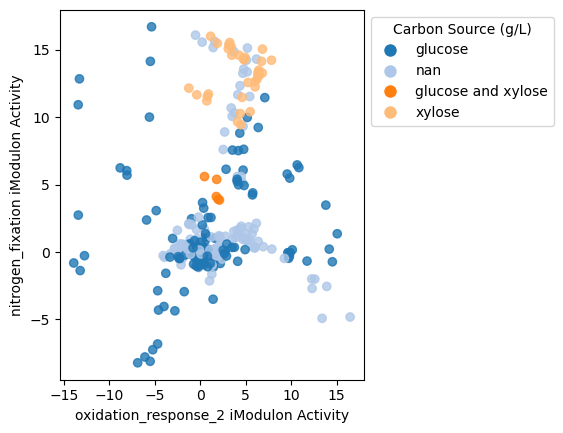

In [3]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = category)
plt.savefig('../figures/compare_activities.pdf', transparent = True)
plt.show()

In [4]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width
ica_data.view_imodulon(iM1)[impt_cols].sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_name,gene_weight,gene_product,COG,regulator,uniprot,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,chromosome_id
ZCP4_1550,eno,0.187395,enolase,Carbohydrate transport and metabolism,NaN,P33675,4.2.1.11,ZMO1_ZMO1608,0.000000,0.000000,CP006818.1
ZCP4_1008,atpD,0.165577,ATP synthase F1 subcomplex beta subunit,Energy production and conversion,NaN,Q5NQY9,3.6.3.14,ZMO1_ZMO0241,-1.111705,-4.499652,CP006818.1
ZCP4_1763,ZCP4_1763,0.154839,hypothetical protein,No COG annotation,ZCP4_1387,NaN,NaN,ZMO1_ZMO2067,0.000000,0.000000,CP006818.1
ZCP4_1009,atpG,0.148311,ATP synthase F1 subcomplex gamma subunit,Energy production and conversion,NaN,Q5NQZ0,NaN,ZMO1_ZMO0240,-1.223089,-5.206528,CP006818.1
ZCP4_1010,atpA,0.147107,ATP synthase F1 subcomplex alpha subunit,Energy production and conversion,NaN,Q5NQZ1,3.6.3.14,ZMO1_ZMO0239,-1.358109,-4.622647,CP006818.1
ZCP4_0623,ZCP4_0623,0.142469,ATP synthase F0 subcomplex C subunit,Energy production and conversion,NaN,Q5NPR8,NaN,ZMO1_ZMO0668,-1.668646,-4.860238,CP006818.1
ZCP4_1067,pgk,0.140106,phosphoglycerate kinase,Nucleotide transport and metabolism,NaN,P09404,2.7.2.3,ZMO1_ZMO0178,0.000000,0.000000,CP006818.1
ZCP4_1068,gap,0.137380,glyceraldehyde-3-phosphate dehydrogenase (NAD+),Carbohydrate transport and metabolism,NaN,P09316,1.2.1.12,ZMO1_ZMO0177,0.000000,0.000000,CP006818.1
ZCP4_1007,ZCP4_1007,0.133544,ATP synthase F1 subcomplex epsilon subunit,Energy production and conversion,NaN,Q5NQY8,NaN,ZMO1_ZMO0242,-1.057651,-5.094703,CP006818.1
ZCP4_0322,eda,0.129047,2-keto-3-deoxy-phosphogluconate aldolase,Carbohydrate transport and metabolism,NaN,Q00384,"4.1.2.14,4.1.3.42",ZMO1_ZMO0997,0.000000,0.000000,CP006818.1


In [48]:
ica_data.view_imodulon(iM2)[impt_cols].sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_name,gene_weight,gene_product,COG,regulator,uniprot,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,chromosome_id,iMs
ZCP4_0579,greB,0.188910,transcription elongation factor GreB,Transcription,NaN,Q5NPL8,NaN,ZMO1_ZMO0718,0.000000,0.000000,CP006818.1,['ETC_and_MEP']
ZCP4_1365,rnfB,0.167314,electron transport complex%2C RnfABCDGE type%2C B subunit,Energy production and conversion,NaN,Q5NLH3,NaN,ZMO1_ZMO1813,0.000000,-4.539192,CP006818.1,['ETC_and_MEP']
ZCP4_1364,rnfA,0.157289,electron transport complex%2C RnfABCDGE type%2C A subunit,Energy production and conversion,NaN,Q5NLH2,NaN,ZMO1_ZMO1814,0.000000,-4.195910,CP006818.1,['ETC_and_MEP']
ZCP4_1366,ZCP4_1366,0.152716,electron transport complex%2C RnfABCDGE type%2C C subunit,Energy production and conversion,NaN,NaN,NaN,ZMO1_ZMO1812,0.000000,-4.151566,CP006818.1,['ETC_and_MEP']
ZCP4_0578,ZCP4_0578,0.146638,soluble lytic murein transglycosylase-like protein,Cell wall/membrane/envelope biogenesis,NaN,NaN,NaN,ZMO1_ZMO0719,-1.489979,-2.826506,CP006818.1,['ETC_and_MEP']
ZCP4_0259,ZCP4_0259,0.141491,SufE protein probably involved in Fe-S center assembly,Function unknown,NaN,NaN,NaN,ZMO1_ZMO1067,-2.175877,0.000000,CP006818.1,['ETC_and_MEP']
ZCP4_0258,ZCP4_0258,0.130503,hypothetical protein,"Intracellular trafficking, secretion, and vesicular transport",ZCP4_1194,NaN,NaN,ZMO1_ZMO1068,0.000000,0.000000,CP006818.1,['ETC_and_MEP']
ZCP4_0096,dxs1,0.128894,1-deoxy-D-xylulose-5-phosphate synthase,Coenzyme transport and metabolism,NaN,Q5NN52,2.2.1.7,ZMO1_ZMO1598,0.000000,0.000000,CP006818.1,"['ETC_and_MEP', 'noise_5']"
ZCP4_1368,rnfG,0.118381,electron transport complex%2C RnfABCDGE type%2C G subunit,Energy production and conversion,NaN,Q5NLH6,NaN,ZMO1_ZMO1810,0.000000,-4.187125,CP006818.1,['ETC_and_MEP']
ZCP4_1367,rnfD,0.117324,electron transport complex%2C RnfABCDGE type%2C D subunit,Energy production and conversion,NaN,Q5NLH5,1.6.5.8,ZMO1_ZMO1811,0.000000,-4.116082,CP006818.1,['ETC_and_MEP']


In [13]:
df = ica_data.sample_table
samps = df[df['study'] == 'ethanologens_ferment'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = abs(bby_A).mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False).head()

/opt/anaconda3/envs/pymodulon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SRX5329169,SRX5329170,SRX5329171,SRX5329172,SRX5329173,SRX5329174,SRX5329175,SRX5329176,SRX5329177,SRX5329178,...,SRX5329186,SRX5329187,SRX5329188,SRX5329189,SRX5329190,SRX5329191,SRX5329192,SRX5329193,SRX5329194,mean
translation_1,-19.068447,0.496391,-0.204973,-19.633593,-10.986669,2.909821,-1.155018,-15.874779,1.250129,-21.103399,...,-21.364896,-13.623367,-17.419898,-21.601870,-21.447648,-21.342877,-10.712371,-13.828143,1.734090,12.157167
nitrogen_fixation,13.566857,-0.434658,0.489943,14.309458,9.318660,-0.263021,-0.134102,13.257256,-0.393272,14.225642,...,15.565945,11.535500,13.357999,16.086894,15.164401,15.128054,8.902487,12.334899,-0.947350,8.997738
motility_1,-11.122430,-0.393978,-5.448388,-13.054859,-11.548374,-3.065194,-4.583000,-15.177976,-2.455192,-12.310056,...,-9.067171,-13.421108,-11.757509,-8.210655,-8.910599,-13.438679,-10.292713,-15.857675,-5.676033,8.879130
ATP_synthase_1,-9.280084,0.473194,-0.422106,-12.199288,-3.285730,-0.144011,1.214841,-10.990825,-0.528180,-9.156500,...,-18.649176,-6.372871,-10.372200,-16.512211,-16.973777,-16.949538,-2.818850,-6.374612,0.336287,7.453166
iron_transport,-8.563226,-2.272171,-0.630287,-8.851163,-7.277762,-12.514311,-11.995157,-8.686614,-10.012886,-7.582308,...,-3.460327,-6.718352,-8.804349,-2.854772,-3.172989,-8.632750,-5.913533,-10.280110,-9.163993,6.952528


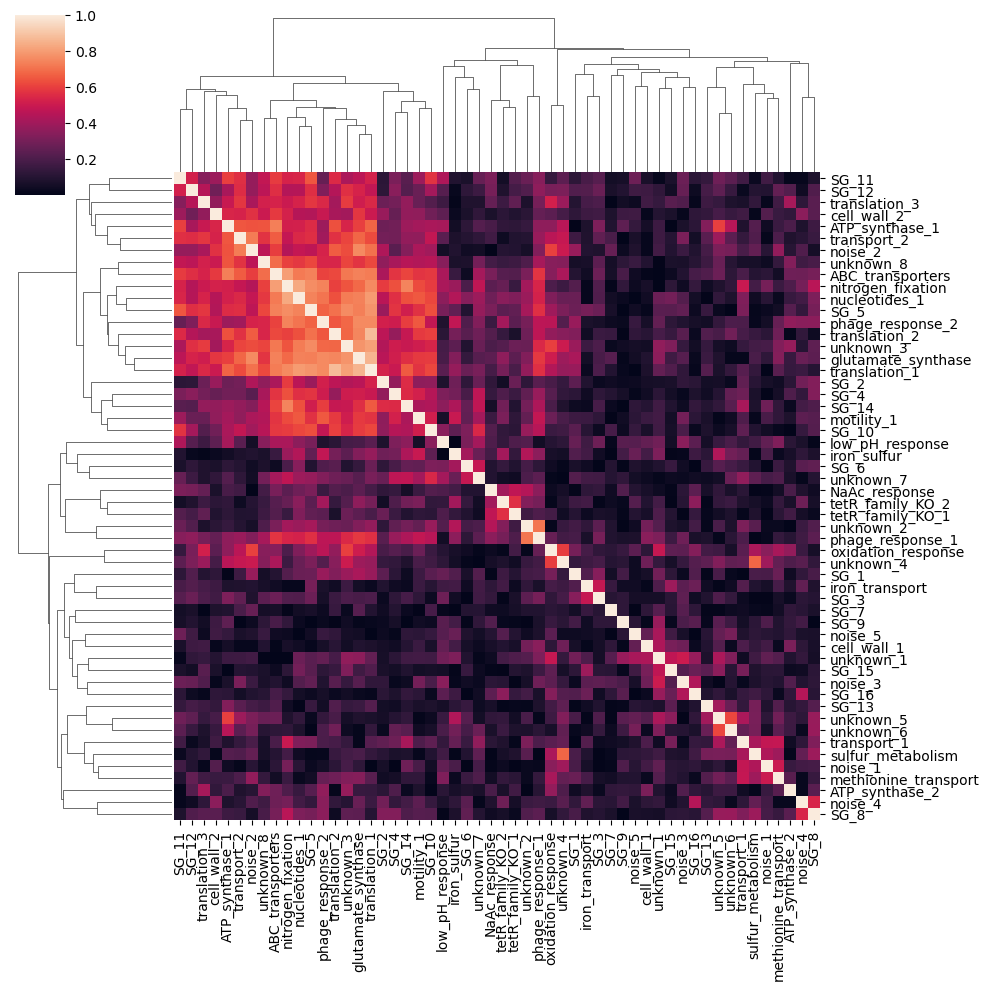

In [19]:
sns.clustermap(abs(ica_data.A.T.corr()), xticklabels=True, yticklabels=True)
plt.show()

# looking into specific metadata activities

In [4]:
df = ica_data.sample_table
samples = df[df['Aerobicity'] == 'aerobic'].index
df_A = ica_data.A[samples].copy()
df_A['mean'] = df_A.mean(axis = 1)
df_A.sort_values(by = 'mean', key = abs, ascending = False).head()

,Kiley_A_DZM0422_Aerobic_A,Kiley_A_DZM0422_Aerobic_B,Kiley_A_DZM0422_Aerobic_C,Kiley_A_WT_Aerobic_A,Kiley_A_WT_Aerobic_B,Kiley_A_WT_Aerobic_C,Kiley_B_WT_+O2_Ctrl_A,Kiley_B_WT_+O2_Ctrl_B,Kiley_B_WT_+O2_Ctrl_C,Kiley_B_WT_+O2_Paraquat_A,Kiley_B_WT_+O2_Paraquat_B,Kiley_B_WT_+O2_Paraquat_C,SRX3316537,SRX3316540,SRX3316548,SRX3316550,SRX3316559,mean
ethanol_fermentation,7.335280,9.484871,7.700632,6.088402,5.668351,5.148396,8.644250,7.437876,6.278454,10.941776,10.221641,9.757518,15.018631,7.263589,17.329134,-0.583992,0.879319,7.918478
oxidation_response,9.885250,10.122263,9.639106,9.723516,9.801443,9.667196,3.494748,2.667199,2.888938,14.523500,11.742961,14.180787,3.547148,-0.948046,4.825983,0.466309,4.117780,7.079181
iron_ABC_transport,-14.878521,-14.755852,-14.976375,-4.606355,-4.553696,-4.054223,-0.451063,0.008628,-0.430405,-2.916887,-1.654444,-2.720177,-1.280081,0.862068,-2.433175,-0.791366,-0.592455,-4.130846
translation_1,-3.246716,-3.712392,-3.099570,-2.675524,-2.152655,-2.530814,-2.072103,-2.176066,-1.680727,-1.421172,-1.527749,-1.645034,-19.830110,-1.733975,-15.468173,-1.906342,2.426253,-3.791345
NaAc_response,3.784216,4.885075,4.455290,7.457384,6.776195,6.683214,4.904664,5.379546,3.627818,3.772869,3.771820,4.347521,-1.000509,-4.990443,0.387934,-1.818151,-0.144542,3.075288


In [5]:
df = ica_data.sample_table
samples = df[df['Carbon Source (g/L)'] == 'xylose'].index
df_A = ica_data.A[samples].copy()
df_A['exp_var'] = ica_data.imodulon_table['explained_variance'].loc[df_A.index]
df_A['std_dev'] = df_A.std(axis = 1)
df_A['mean'] = df_A.mean(axis = 1)
df_A = df_A[df_A.columns[::-1]]
df_A = df_A[df_A['exp_var'] > 0.02]
df_A.sort_values(by = 'mean', key = abs, ascending = False)

,mean,std_dev,exp_var,SRX3541453,SRX3541452,SRX3541451,SRX3541450,SRX3541449,SRX3541445,SRX3541444,...,SRX6700183,SRX6700182,SRX6700181,SRX6700180,SRX6700173,SRX6700172,SRX6700171,SRX6700170,SRX6700169,SRX6700168
translation_1,-17.076086,4.464851,0.064288,-16.723998,-17.130700,-19.420271,-17.039259,-16.840681,-12.823876,-14.454336,...,-21.604583,-14.757824,-14.926019,-15.347307,-21.794321,-23.117117,-20.199043,-14.821889,-15.055730,-14.018694
nitrogen_fixation,12.497279,2.870948,0.024464,11.659404,11.715183,11.539513,12.154704,11.209166,9.431653,9.647964,...,14.440489,12.844351,13.341014,13.117435,15.197360,14.607092,14.597009,12.575175,12.651490,11.470131
glycolysis_and_ATP_synthase,-10.130239,5.483293,0.027824,-17.045236,-16.090108,-16.125966,-14.909694,-15.369655,-8.762317,-7.673726,...,-10.095521,-2.401455,-3.366530,-1.970703,-10.386846,-9.580284,-7.341944,-3.769619,-3.342233,-2.412620
phage_formation,8.623954,2.237687,0.024910,8.966342,8.782168,10.898162,10.995466,8.599329,7.331107,7.363011,...,9.854268,7.958024,8.366785,8.241637,10.098000,7.965941,8.610931,7.441289,8.039905,6.802368
fructose_transport_maybe,8.020540,2.608079,0.027960,7.648177,8.122629,9.501770,9.571610,8.182888,6.208180,7.974434,...,11.497616,5.902347,6.564173,6.724097,12.810017,12.428179,12.031415,7.091360,7.197710,6.287272
ethanol_fermentation,-1.995385,2.431559,0.036682,-3.974790,-3.818856,-3.773826,-2.786806,-3.667038,-3.204136,-1.314944,...,-1.615837,3.387649,1.270713,3.711692,-6.089410,-4.758915,-4.595090,-1.760358,0.225784,-0.392535


# comparing between species

In [36]:
from pymodulon.compare import *

ecoli_gb= '../data/external/GenBank/eco.gb'
zym_gb = '../data/external/GenBank/zym.gb'
ecoli_out = '../data/external/GenBank/eco_prot.fasta'
zym_out = '../data/external/GenBank/zym_prot.fasta'

make_prots(ecoli_gb,ecoli_out)
make_prots(zym_gb,zym_out)

make_prot_db(ecoli_out)
make_prot_db(zym_out)
bbh_df = get_bbh(zym_out, ecoli_out, outdir = '../data/external/GenBank/output')

BLAST DB files already exist
BLAST DB files already exist
../data/external/GenBank/zym_prot.fasta  already blasted
../data/external/GenBank/eco_prot.fasta  already blasted
parsing BBHs for zym_prot eco_prot
Saving results to: ../data/external/GenBank/output/zym_prot_vs_eco_prot_parsed.csv


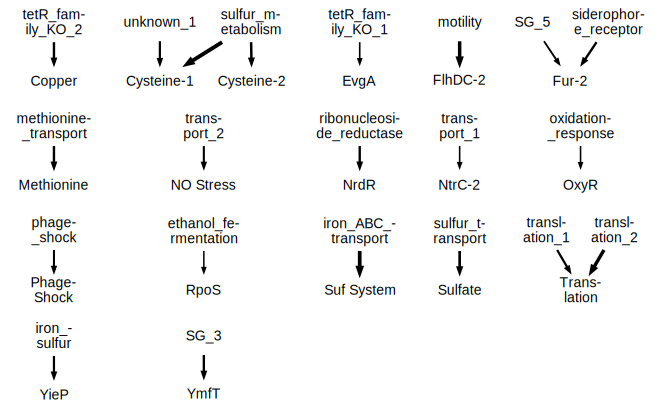

In [40]:
links,dots = compare_ica(ica_data.M, eco_data.M, 
                         ortho_file = bbh_df,#'../data/external/GenBank/output/zym_prot_vs_eco_prot.txt',
                         cutoff = 0.3)
dots